In [82]:
import pandas as pd
#from prettytable import PrettyTable
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
#from sklearn.preprocessing import MinMaxScaler
#from scipy.cluster.hierarchy import dendrogram, linkage
#from scipy.spatial.distance import squareform
#from sklearn.metrics import mean_absolute_error, mean_squared_error
#from statsmodels.graphics.tsaplots import plot_pacf
#import datetime
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.model_selection import train_test_split
#import torch
#from torch import nn
#from torch.nn import functional as F
#from torch import optim
#from torch.utils.data import Dataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv("Z:\\Sasindu\\Access Training\\SQL cleaned data\\cleaned_weather_data.csv" )

In [84]:
df = pd.DataFrame(data)

In [85]:
df.head()

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
0,NaN,NaN,0.0,1,NaN,0.0,NaN,NaN,NaN,14.0,NaN,1954-06-01
1,NaN,NaN,0.5,1,NaN,0.0,NaN,NaN,NaN,13.2,NaN,1954-06-02
2,NaN,NaN,0.0,1,NaN,0.0,NaN,NaN,NaN,16.6,NaN,1954-06-03
3,NaN,NaN,1.2,1,NaN,0.0,NaN,NaN,NaN,15.2,NaN,1954-06-04
4,NaN,NaN,6.0,1,NaN,0.0,NaN,NaN,NaN,15.2,NaN,1954-06-05


In [86]:
df.shape

(25051, 12)

In [87]:
df.describe()

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM
count,13793.000000,13809.000000,25051.000000,25051.000000,24746.000000,23484.000000,13860.000000,13874.000000,13874.000000,25051.000000,13874.000000
mean,9.452258,2.577739,2.627951,2.686679,4.883254,1.013328,5.277778,9.558238,955.134064,9.612083,73.309500
std,4.297915,1.304984,5.911350,2.880991,4.389391,3.663570,2.406916,4.070129,7.512486,7.908055,13.350476
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,913.000000,-20.000000,20.000000
25%,6.000000,2.000000,0.000000,0.000000,1.000000,0.000000,4.000000,6.000000,951.000000,3.400000,64.000000
50%,8.000000,2.000000,0.000000,1.000000,4.000000,0.000000,6.000000,9.000000,956.000000,9.900000,74.000000
75%,12.000000,3.000000,2.600000,6.000000,8.000000,0.000000,7.000000,13.000000,960.000000,15.800000,84.000000
max,39.000000,11.000000,101.600000,8.000000,16.000000,55.000000,8.000000,22.000000,980.000000,30.400000,100.000000


In [88]:
missing_values =df.isnull().sum()
print(missing_values)

FX              11258
FM              11242
RSK                 0
RSKF                0
SDK               305
SHK_TAG          1567
NM              11191
VPM             11177
PM              11177
TMK                 0
UPM             11177
UPDATED_DATE        0
dtype: int64


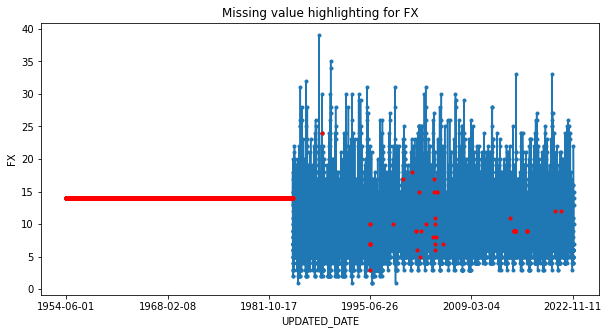

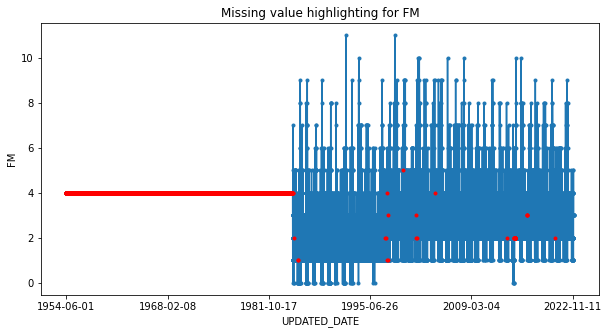

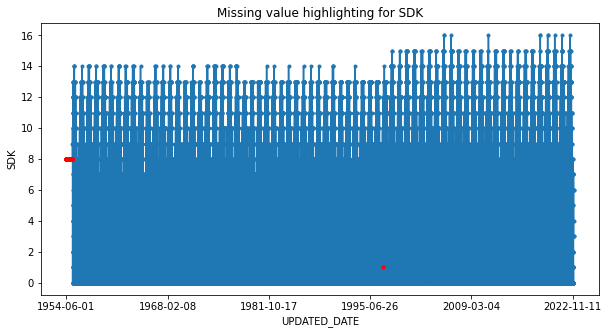

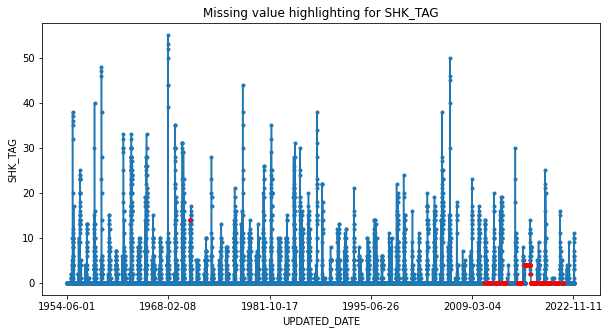

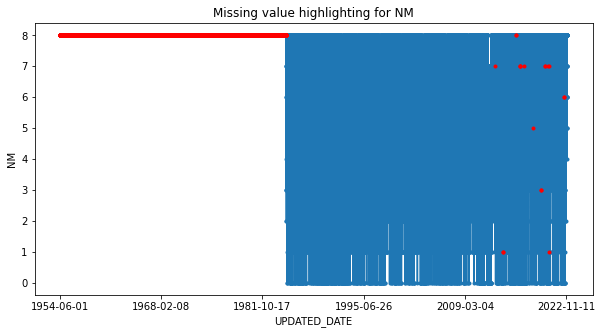

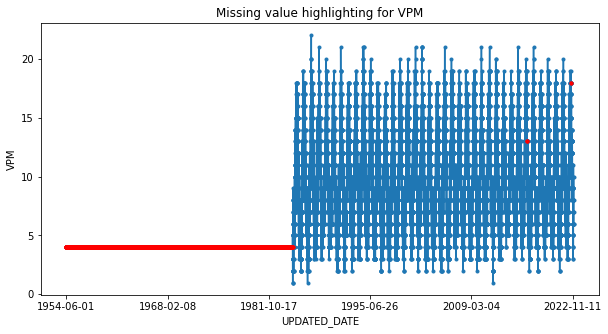

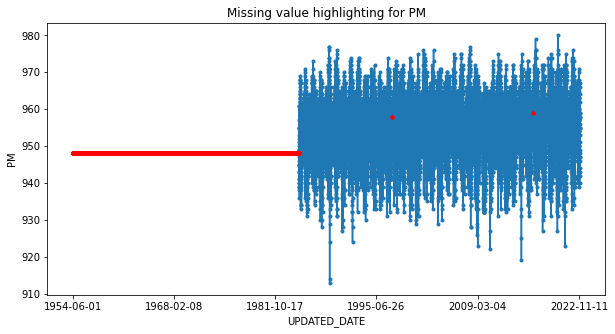

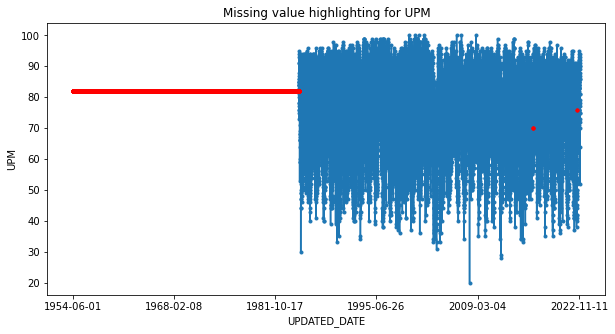

In [89]:
missing_cols = ['UPDATED_DATE', 'FX', 'FM', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'UPM']
for idx, column in enumerate(missing_cols):
    if column != 'UPDATED_DATE':
        bfm = data[['UPDATED_DATE', column]]
        bfm.set_index('UPDATED_DATE', inplace=True)
        bfm_imputed = bfm.fillna(method='bfill')
        ax = bfm_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
        bfm_imputed[bfm.isnull()].plot(ax=ax, marker=".", legend='Test', color='r')
        ax.set_title(f'Missing value highlighting for {column}')
        ax.set_ylabel(f'{column}')
        ax.get_legend().remove()

In [90]:
data.loc[(data['UPDATED_DATE'] > '1984-12-28') & (data['UPDATED_DATE'] < '1985-01-04')]

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
11169,NaN,NaN,1.1,6,0.0,0.0,NaN,NaN,NaN,-2.3,NaN,1984-12-29
11170,NaN,NaN,2.4,6,1.0,2.0,NaN,NaN,NaN,-3.2,NaN,1984-12-30
11171,NaN,NaN,0.1,6,0.0,5.0,NaN,NaN,NaN,-6.6,NaN,1984-12-31
11172,14.0,4.0,1.2,7,0.0,5.0,8.0,4.0,948.0,-2.4,82.0,1985-01-01
11173,14.0,4.0,4.5,7,0.0,8.0,8.0,5.0,939.0,-4.0,94.0,1985-01-02
11174,13.0,4.0,1.5,7,0.0,19.0,7.0,3.0,945.0,-6.8,83.0,1985-01-03


In [91]:
df_N = df.loc[df['UPDATED_DATE']>='1985-01-01']


In [92]:
df_N

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE
11172,14.0,4.0,1.2,7,0.0,5.0,8.0,4.0,948.0,-2.4,82.0,1985-01-01
11173,14.0,4.0,4.5,7,0.0,8.0,8.0,5.0,939.0,-4.0,94.0,1985-01-02
11174,13.0,4.0,1.5,7,0.0,19.0,7.0,3.0,945.0,-6.8,83.0,1985-01-03
11175,18.0,4.0,4.3,7,3.0,21.0,6.0,3.0,940.0,-9.5,88.0,1985-01-04
11176,6.0,2.0,1.3,7,1.0,26.0,8.0,2.0,945.0,-11.4,86.0,1985-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...
25046,14.0,3.0,0.0,0,6.0,0.0,5.0,7.0,966.0,4.5,77.0,2022-12-27
25047,7.0,3.0,0.0,0,4.0,0.0,7.0,6.0,959.0,5.1,70.0,2022-12-28
25048,10.0,3.0,1.2,6,3.0,0.0,8.0,6.0,953.0,8.9,52.0,2022-12-29
25049,13.0,3.0,1.5,6,6.0,0.0,6.0,8.0,955.0,7.4,78.0,2022-12-30


In [93]:
new_missing_values =df_N.isnull().sum()
print(new_missing_values)

FX                86
FM                70
RSK                0
RSKF               0
SDK                1
SHK_TAG         1566
NM                19
VPM                5
PM                 5
TMK                0
UPM                5
UPDATED_DATE       0
dtype: int64


### Filling missing values using back filling method.

In [94]:
new_missing_cols = ['UPDATED_DATE', 'FX', 'FM', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'UPM']

In [95]:
# Backfilling means that a missing value is replaced by the next valid value found in the column.

for col in new_missing_cols:
    df_N[col] = df_N[col].fillna(method='bfill')

In [96]:
new_missing_values =df_N.isnull().sum()
print(new_missing_values)

FX              0
FM              0
RSK             0
RSKF            0
SDK             0
SHK_TAG         0
NM              0
VPM             0
PM              0
TMK             0
UPM             0
UPDATED_DATE    0
dtype: int64


### Exploratory Data Analysis

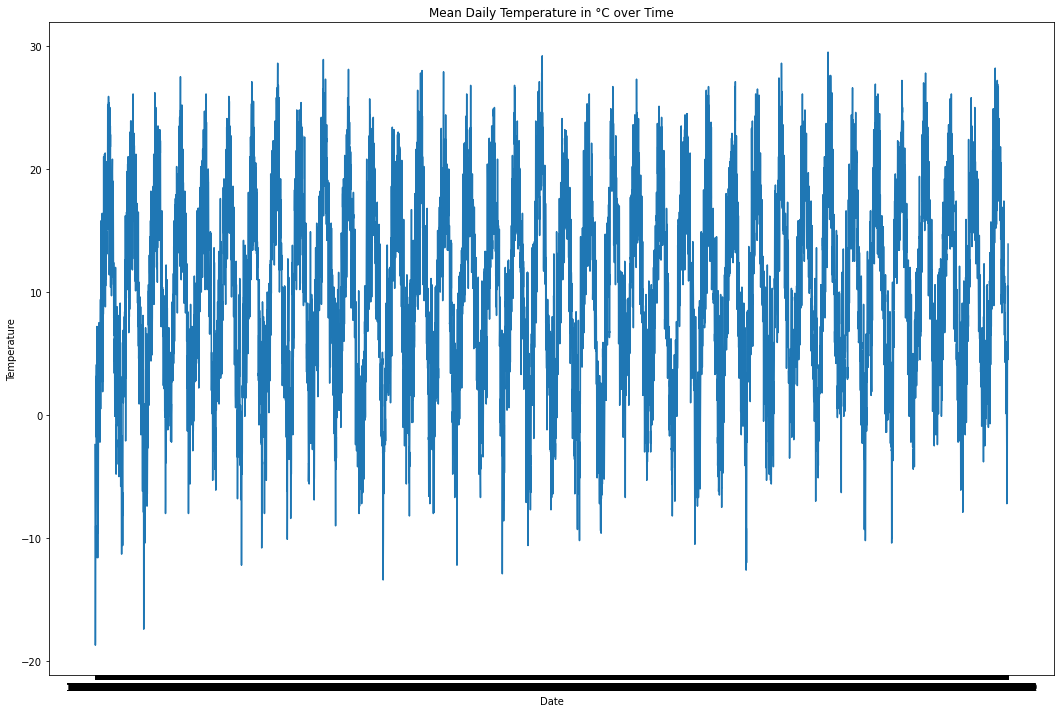

In [97]:
plt.figure(figsize=(18,12))
sns.lineplot(data=df_N, x='UPDATED_DATE', y='TMK')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.title('Mean Daily Temperature in °C over Time')
plt.show()

<Figure size 720x720 with 0 Axes>

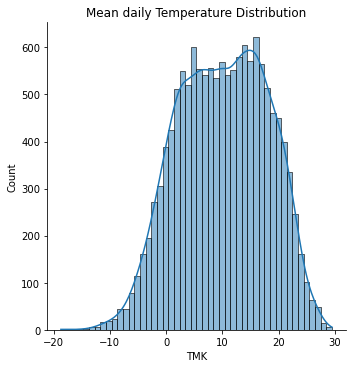

In [98]:
plt.figure(figsize=(10,10))
sns.displot(df_N['TMK'],kde=True)
plt.title('Mean daily Temperature Distribution')
plt.show()

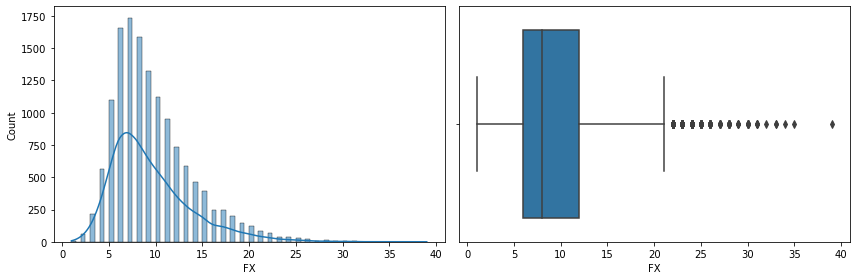

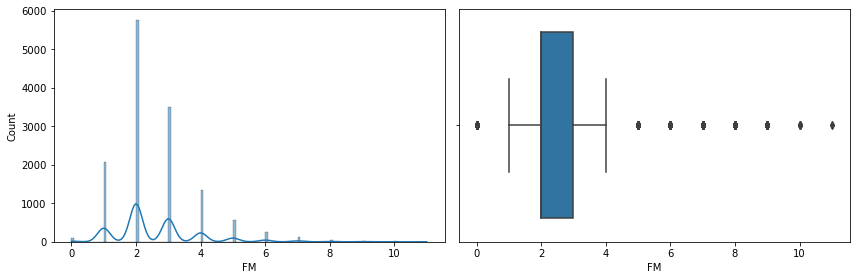

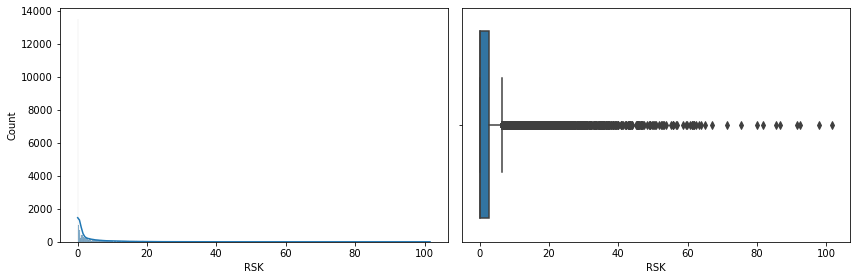

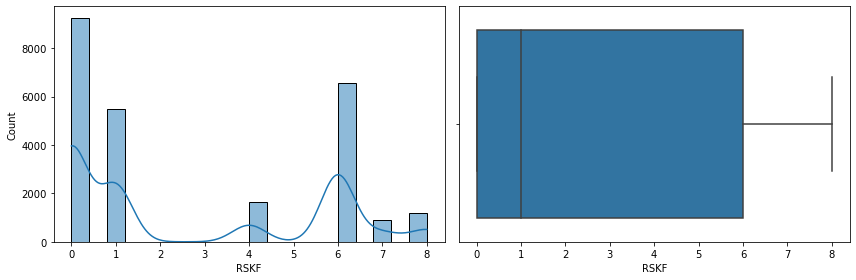

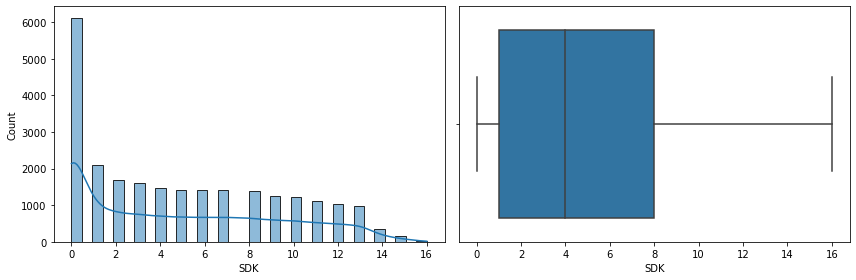

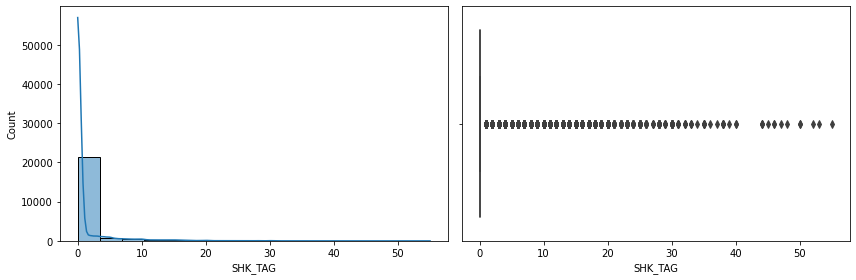

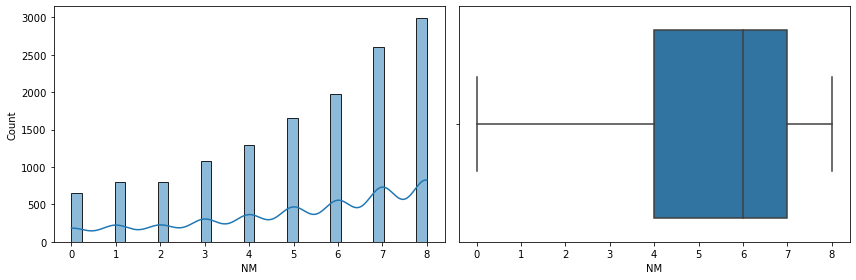

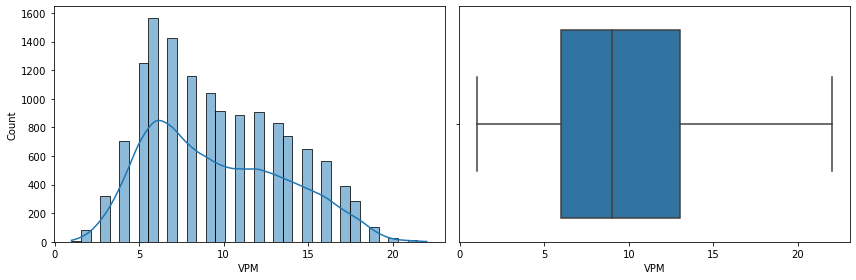

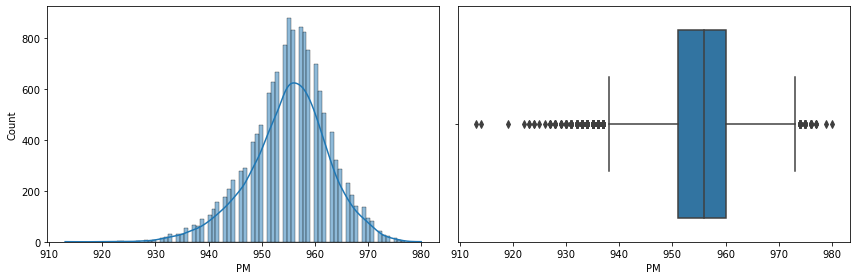

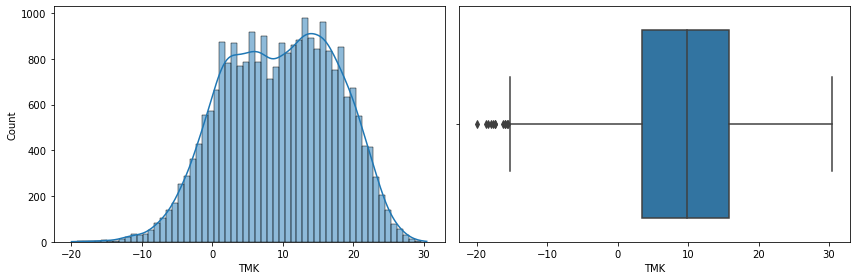

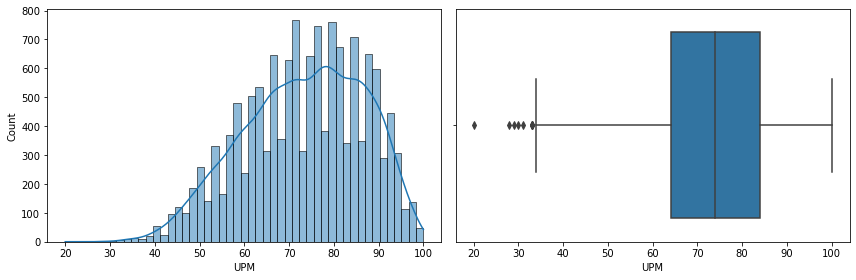

In [99]:
num_features = ['FX', 'FM','RSK','RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM','TMK','UPM']
for column in num_features:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.tight_layout()
    plt.show()

<Figure size 1440x1440 with 0 Axes>

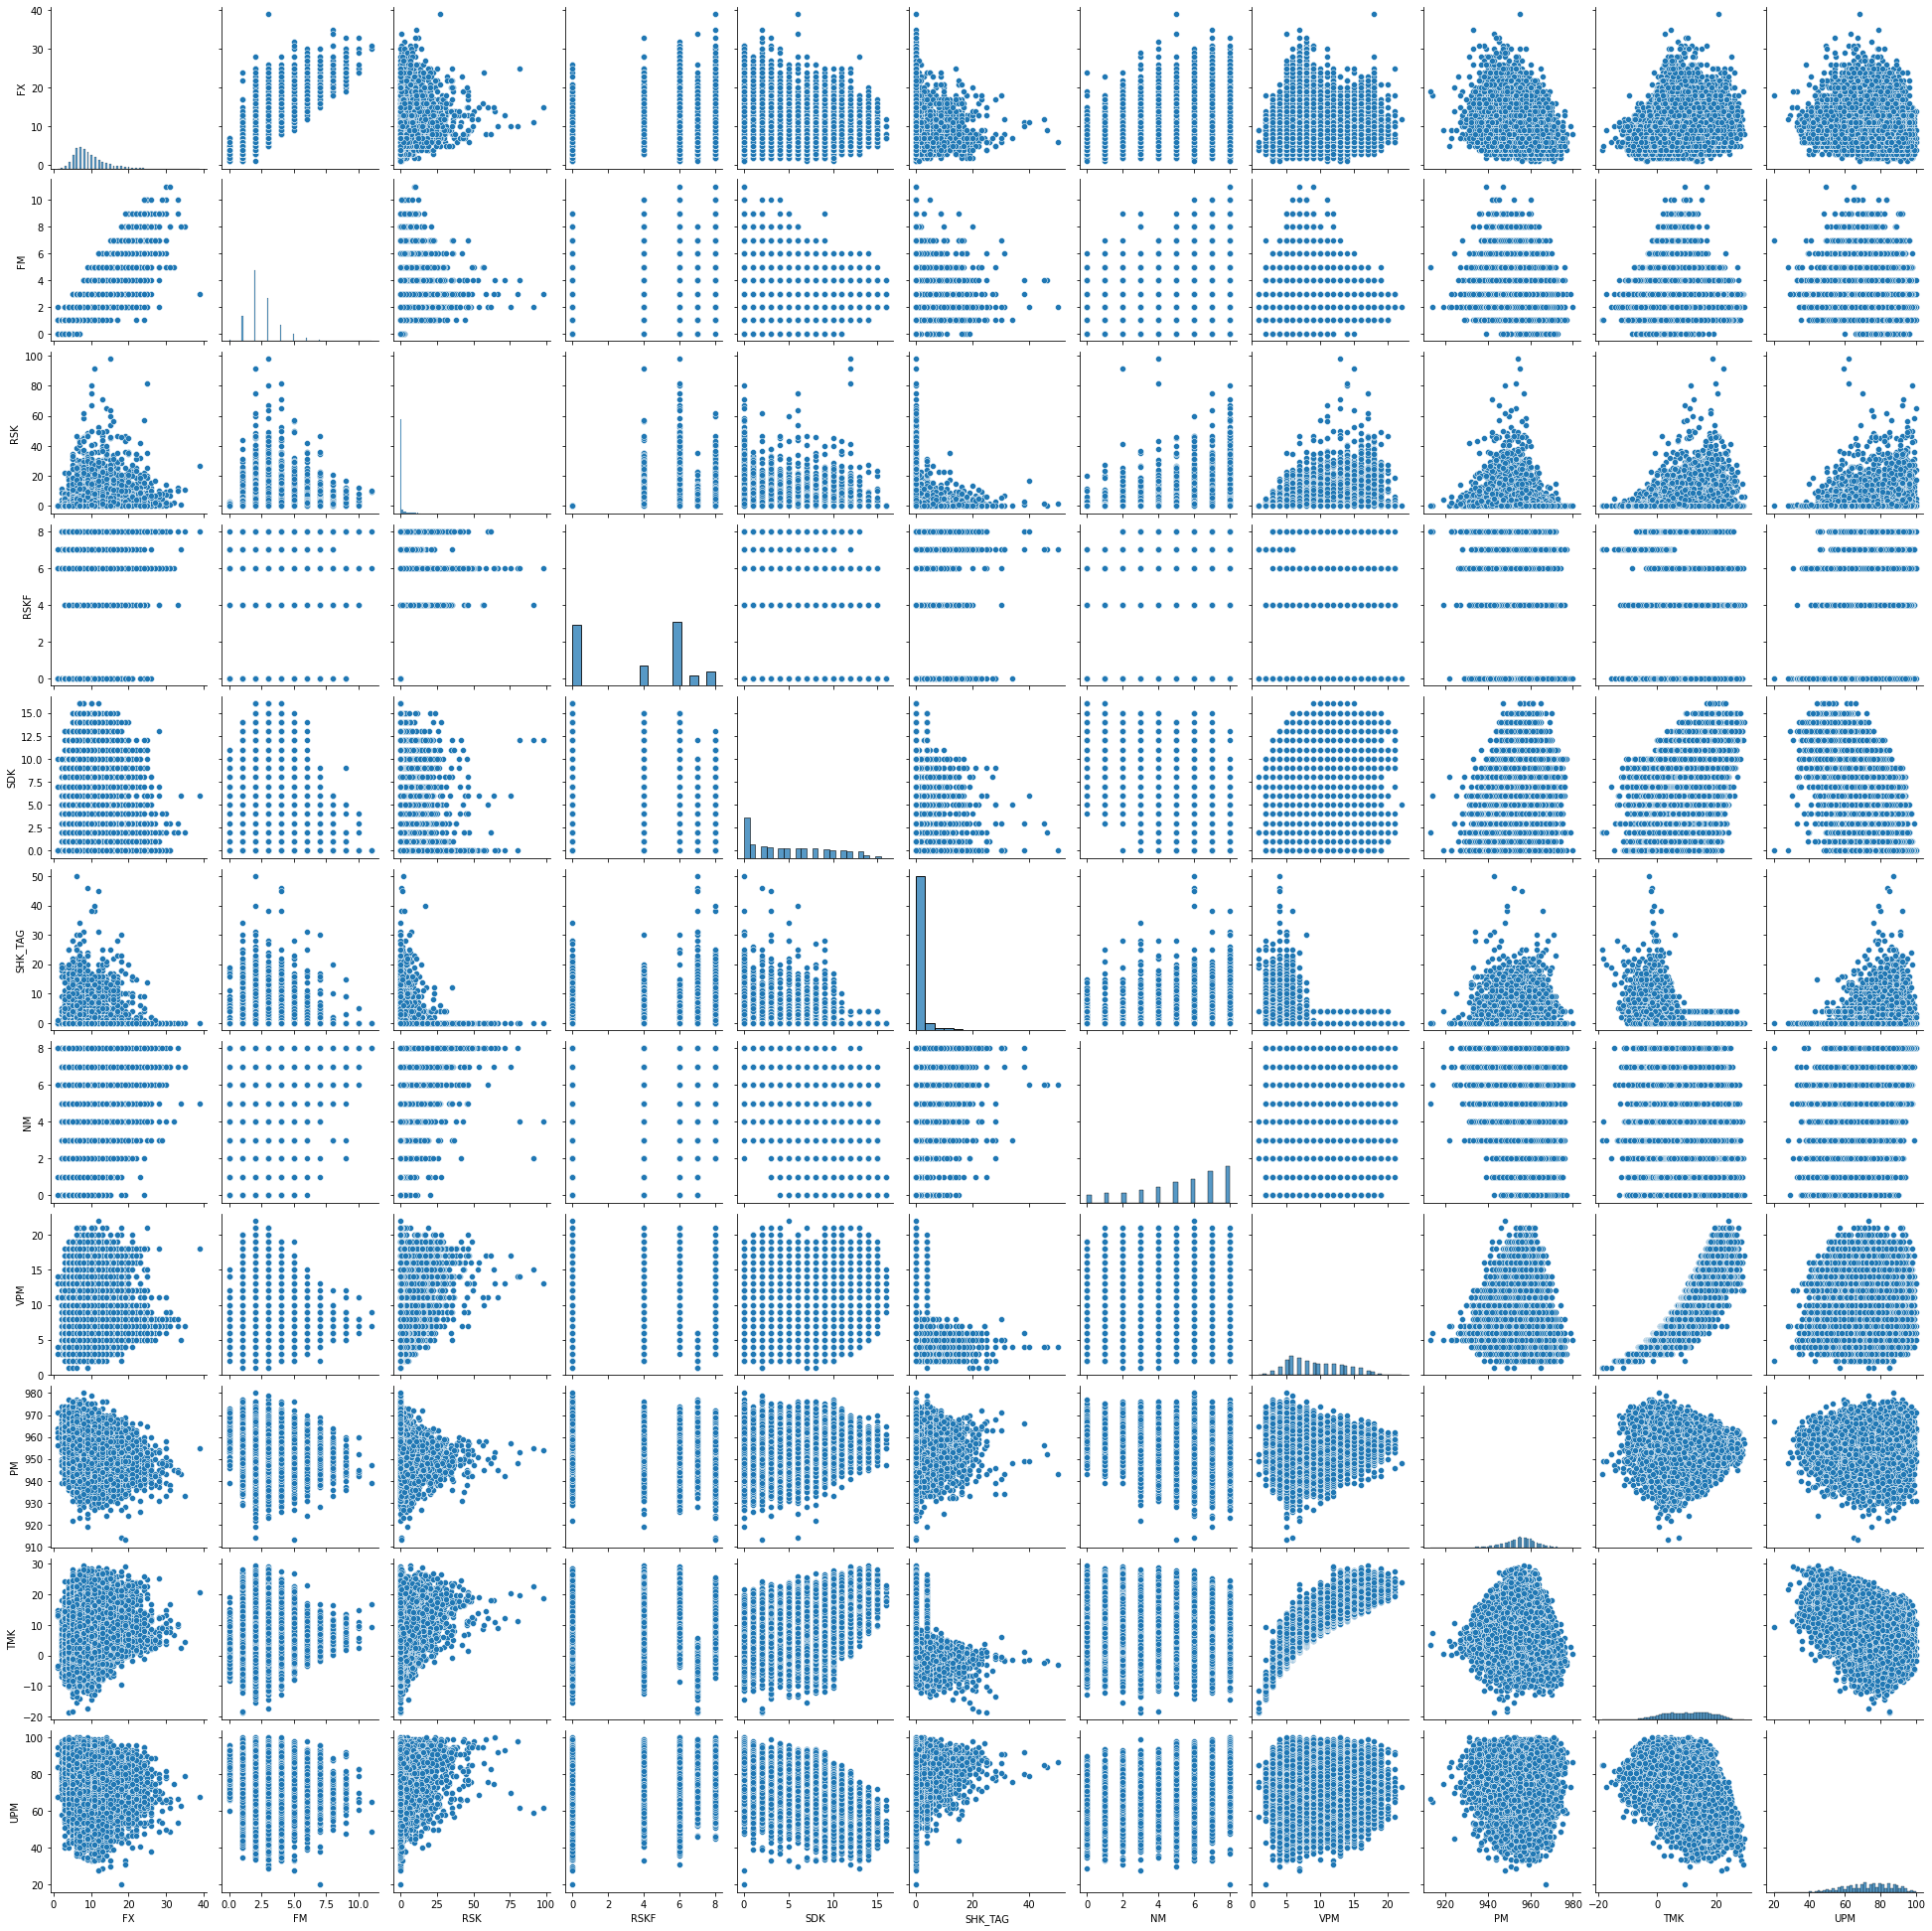

In [100]:
plt.figure(figsize=(20, 20))
sns.pairplot(df_N,palette='set1')
plt.show()

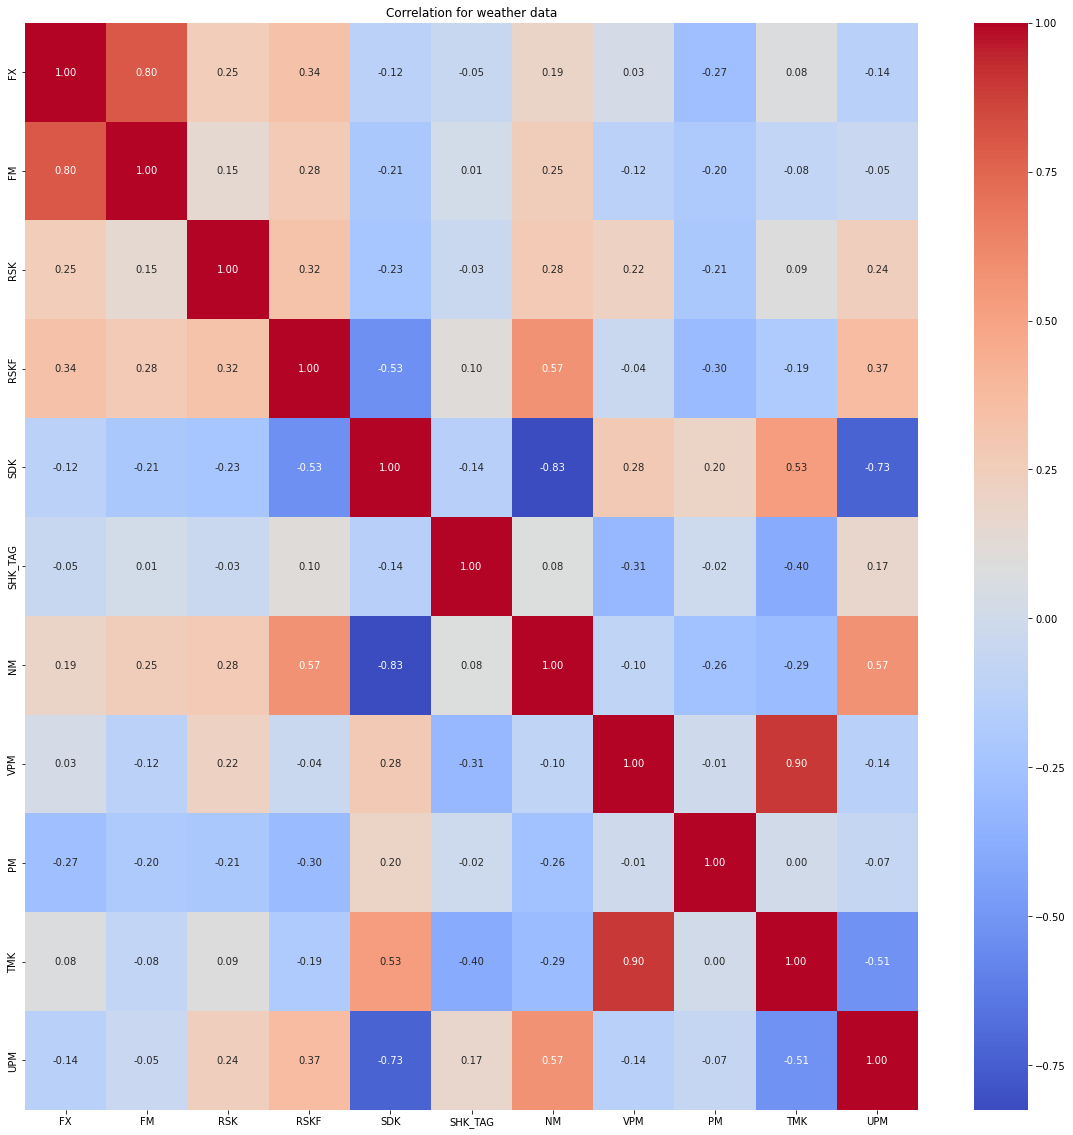

In [101]:
numeric_df = df_N.select_dtypes(include = ['number'])
corr_matrix =numeric_df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',fmt=".2f")
plt.title('Correlation for weather data')
plt.show()

##### Highly positive correlation between VPM & TMK
##### Highly positive correlation between FX & FM
##### Highly negative correlation between SDK & UPM
##### Highly negative correlation between SDK & NM

In [102]:
f = df_N.copy().drop(columns=['UPDATED_DATE', 'TMK']).columns.tolist()

In [103]:
print(f)

['FX', 'FM', 'RSK', 'RSKF', 'SDK', 'SHK_TAG', 'NM', 'VPM', 'PM', 'UPM']


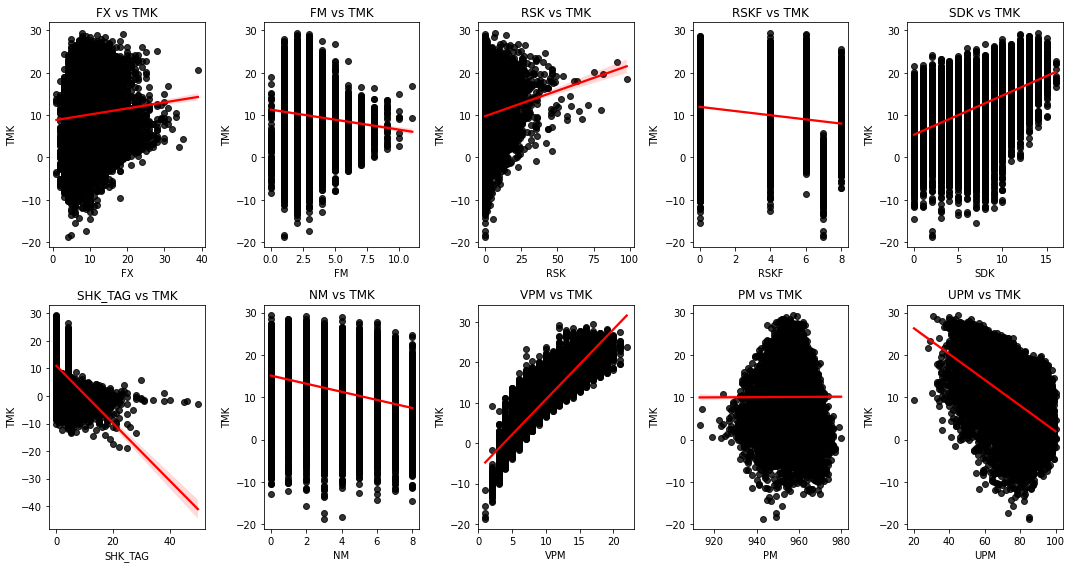

In [104]:
fig, axes = plt.subplots(2,5,figsize=(15,8))
axes = axes.flatten()
for i, feature in enumerate(f):
    sns.regplot(x=feature, y = df_N['TMK'],data=df_N, ax =axes[i],scatter_kws={"color":"black"},line_kws={"color":"red"} )
    axes[i].set_title(f"{feature} vs TMK")
plt.tight_layout()
plt.show()

##### Hierarchial Clustering
###### can see the strength and the direction of relationship between above features.

In [105]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

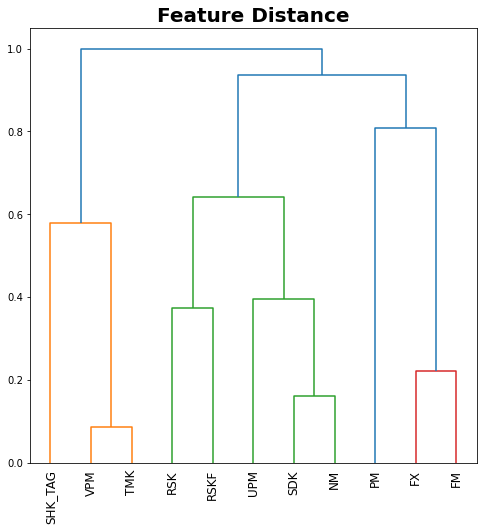

In [106]:
hc = df_N.copy().drop(columns=['UPDATED_DATE'])
corr = hc.corr(method ='spearman')
dist_linkage = linkage(squareform(1-abs(corr)),'complete')
plt.figure(figsize=(8,8))
dendro = dendrogram(dist_linkage,labels = hc.columns,leaf_rotation=90)
plt.title('Feature Distance' ,weight='bold',size =20)
plt.show()

### Auto Correlation
###### Auto correlation is check correlation one lag after one lag (y(t )with y(t) , y(t) with y(t-1) ,y(t) with y(t-2)...)
###### This proceture is doing for time seris (like weather forecasting)
###### we can check whether data set is stationary or not
###### For time series forcasting dataset shold be stationary if not we should convert it to stationary. to do this , one way is 1 st order difference.

In [107]:
from statsmodels.graphics.tsaplots import plot_pacf

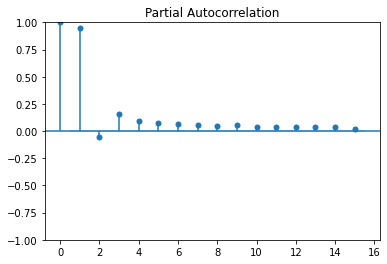

In [108]:
plot_pacf(data['TMK'], lags = 15)
plt.show();

In [109]:
###### log-1 has high correlation so for feature engineering we can get log-1

## Lag Feature

In [110]:
df_N['TMK_LAG'] = df_N['TMK'].shift(1)

In [111]:
df_N = df_N.dropna()  # Delete null row in the data frame

## Feature Engineering

In [112]:
import datetime

In [113]:
df_N['UPDATED_DATE'] = pd.to_datetime(df_N['UPDATED_DATE'])
df_N['YEAR'] = df_N['UPDATED_DATE'].dt.year
df_N['MONTH'] = df_N['UPDATED_DATE'].dt.month
df_N['DAY'] = df_N['UPDATED_DATE'].dt.day

In [114]:
print(df_N['YEAR'],df_N['MONTH'],df_N['DAY'])

11173    1985
11174    1985
11175    1985
11176    1985
11177    1985
         ... 
25046    2022
25047    2022
25048    2022
25049    2022
25050    2022
Name: YEAR, Length: 13878, dtype: int64 11173     1
11174     1
11175     1
11176     1
11177     1
         ..
25046    12
25047    12
25048    12
25049    12
25050    12
Name: MONTH, Length: 13878, dtype: int64 11173     2
11174     3
11175     4
11176     5
11177     6
         ..
25046    27
25047    28
25048    29
25049    30
25050    31
Name: DAY, Length: 13878, dtype: int64


In [115]:
df_N['DAY_OF_YEAR'] = df_N['UPDATED_DATE'].dt.dayofyear
df_N['WEEK_OF_YEAR'] = df_N['UPDATED_DATE'].dt.week
df_N['QUARTER'] = df_N['UPDATED_DATE'].dt.quarter

In [116]:
print(df_N['DAY_OF_YEAR'],df_N['WEEK_OF_YEAR'],df_N['QUARTER'])

11173      2
11174      3
11175      4
11176      5
11177      6
        ... 
25046    361
25047    362
25048    363
25049    364
25050    365
Name: DAY_OF_YEAR, Length: 13878, dtype: int64 11173     1
11174     1
11175     1
11176     1
11177     1
         ..
25046    52
25047    52
25048    52
25049    52
25050    52
Name: WEEK_OF_YEAR, Length: 13878, dtype: int64 11173    1
11174    1
11175    1
11176    1
11177    1
        ..
25046    4
25047    4
25048    4
25049    4
25050    4
Name: QUARTER, Length: 13878, dtype: int64


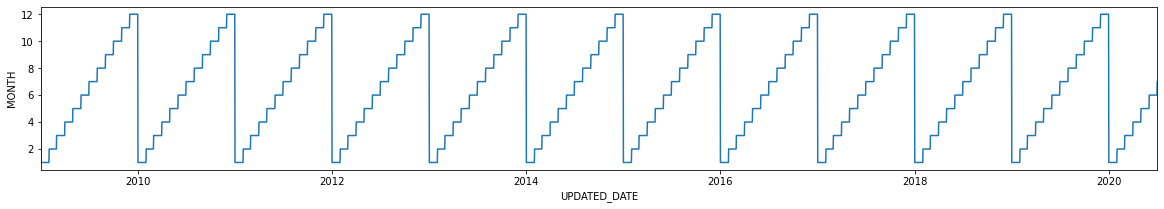

In [117]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,3))
sns.lineplot(x=df_N.UPDATED_DATE, y = df_N.MONTH)
ax.set_xlim([date(2009,1,1),date(2020,6,30)])
plt.show()

In [118]:
def periodic_transform(dff,variable):
    dff[f"{variable}_SIN"] = np.sin(dff[variable] / dff[variable].max()*2*np.pi)
    dff[f"{variable}_COS"] = np.cos(dff[variable] / dff[variable].max()*2*np.pi)
    return dff

In [119]:
df_N = periodic_transform(df_N, 'DAY')
df_N = periodic_transform(df_N, 'MONTH')
df_N = periodic_transform(df_N, 'DAY_OF_YEAR')
df_N = periodic_transform(df_N, 'WEEK_OF_YEAR')
df_N = periodic_transform(df_N, 'QUARTER')
df_N

,FX,FM,RSK,RSKF,SDK,SHK_TAG,NM,VPM,PM,TMK,...,DAY_SIN,DAY_COS,MONTH_SIN,MONTH_COS,DAY_OF_YEAR_SIN,DAY_OF_YEAR_COS,WEEK_OF_YEAR_SIN,WEEK_OF_YEAR_COS,QUARTER_SIN,QUARTER_COS
11173,14.0,4.0,4.5,7,0.0,8.0,8.0,5.0,939.0,-4.0,...,3.943559e-01,0.918958,5.000000e-01,0.866025,0.034328,0.999411,0.118273,0.992981,1.000000e+00,6.123234e-17
11174,13.0,4.0,1.5,7,0.0,19.0,7.0,3.0,945.0,-6.8,...,5.712682e-01,0.820763,5.000000e-01,0.866025,0.051479,0.998674,0.118273,0.992981,1.000000e+00,6.123234e-17
11175,18.0,4.0,4.3,7,3.0,21.0,6.0,3.0,940.0,-9.5,...,7.247928e-01,0.688967,5.000000e-01,0.866025,0.068615,0.997643,0.118273,0.992981,1.000000e+00,6.123234e-17
11176,6.0,2.0,1.3,7,1.0,26.0,8.0,2.0,945.0,-11.4,...,8.486443e-01,0.528964,5.000000e-01,0.866025,0.085731,0.996318,0.118273,0.992981,1.000000e+00,6.123234e-17
11177,5.0,2.0,0.0,7,5.0,28.0,3.0,2.0,946.0,-13.6,...,9.377521e-01,0.347305,5.000000e-01,0.866025,0.102821,0.994700,0.118273,0.992981,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25046,14.0,3.0,0.0,0,6.0,0.0,5.0,7.0,966.0,4.5,...,-7.247928e-01,0.688967,-2.449294e-16,1.000000,-0.085731,0.996318,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25047,7.0,3.0,0.0,0,4.0,0.0,7.0,6.0,959.0,5.1,...,-5.712682e-01,0.820763,-2.449294e-16,1.000000,-0.068615,0.997643,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25048,10.0,3.0,1.2,6,3.0,0.0,8.0,6.0,953.0,8.9,...,-3.943559e-01,0.918958,-2.449294e-16,1.000000,-0.051479,0.998674,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25049,13.0,3.0,1.5,6,6.0,0.0,6.0,8.0,955.0,7.4,...,-2.012985e-01,0.979530,-2.449294e-16,1.000000,-0.034328,0.999411,-0.118273,0.992981,-2.449294e-16,1.000000e+00


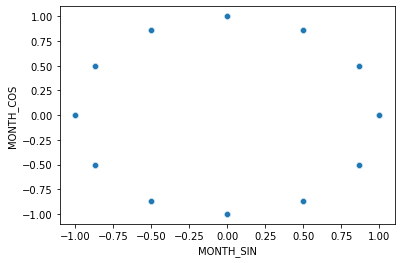

In [120]:
sns.scatterplot(x=df_N['MONTH_SIN'],y=df_N['MONTH_COS'])
plt.show()

## Preprocessing
###### Because of having higher correlation with (SDK , NM) and (SDK , UPM) we remove SDK,  Features with a strong correlation to the target variable are likely to have a higher impact on the prediction and can be considered important in the model building process.(feature redudency)

In [121]:
df_N = df_N.drop(columns=['SDK','FX','DAY','MONTH', 'DAY_OF_YEAR', 'WEEK_OF_YEAR', 'QUARTER'])

In [122]:
df_N

,FM,RSK,RSKF,SHK_TAG,NM,VPM,PM,TMK,UPM,UPDATED_DATE,...,DAY_SIN,DAY_COS,MONTH_SIN,MONTH_COS,DAY_OF_YEAR_SIN,DAY_OF_YEAR_COS,WEEK_OF_YEAR_SIN,WEEK_OF_YEAR_COS,QUARTER_SIN,QUARTER_COS
11173,4.0,4.5,7,8.0,8.0,5.0,939.0,-4.0,94.0,1985-01-02,...,3.943559e-01,0.918958,5.000000e-01,0.866025,0.034328,0.999411,0.118273,0.992981,1.000000e+00,6.123234e-17
11174,4.0,1.5,7,19.0,7.0,3.0,945.0,-6.8,83.0,1985-01-03,...,5.712682e-01,0.820763,5.000000e-01,0.866025,0.051479,0.998674,0.118273,0.992981,1.000000e+00,6.123234e-17
11175,4.0,4.3,7,21.0,6.0,3.0,940.0,-9.5,88.0,1985-01-04,...,7.247928e-01,0.688967,5.000000e-01,0.866025,0.068615,0.997643,0.118273,0.992981,1.000000e+00,6.123234e-17
11176,2.0,1.3,7,26.0,8.0,2.0,945.0,-11.4,86.0,1985-01-05,...,8.486443e-01,0.528964,5.000000e-01,0.866025,0.085731,0.996318,0.118273,0.992981,1.000000e+00,6.123234e-17
11177,2.0,0.0,7,28.0,3.0,2.0,946.0,-13.6,77.0,1985-01-06,...,9.377521e-01,0.347305,5.000000e-01,0.866025,0.102821,0.994700,0.118273,0.992981,1.000000e+00,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25046,3.0,0.0,0,0.0,5.0,7.0,966.0,4.5,77.0,2022-12-27,...,-7.247928e-01,0.688967,-2.449294e-16,1.000000,-0.085731,0.996318,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25047,3.0,0.0,0,0.0,7.0,6.0,959.0,5.1,70.0,2022-12-28,...,-5.712682e-01,0.820763,-2.449294e-16,1.000000,-0.068615,0.997643,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25048,3.0,1.2,6,0.0,8.0,6.0,953.0,8.9,52.0,2022-12-29,...,-3.943559e-01,0.918958,-2.449294e-16,1.000000,-0.051479,0.998674,-0.118273,0.992981,-2.449294e-16,1.000000e+00
25049,3.0,1.5,6,0.0,6.0,8.0,955.0,7.4,78.0,2022-12-30,...,-2.012985e-01,0.979530,-2.449294e-16,1.000000,-0.034328,0.999411,-0.118273,0.992981,-2.449294e-16,1.000000e+00


In [123]:
X = df_N
Y = df_N['TMK']

In [144]:
X.columns

Index(['FM', 'RSK', 'RSKF', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM',
       'UPDATED_DATE', 'TMK_LAG', 'YEAR', 'DAY_SIN', 'DAY_COS', 'MONTH_SIN',
       'MONTH_COS', 'DAY_OF_YEAR_SIN', 'DAY_OF_YEAR_COS', 'WEEK_OF_YEAR_SIN',
       'WEEK_OF_YEAR_COS', 'QUARTER_SIN', 'QUARTER_COS'],
      dtype='object')

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [125]:
mm = MinMaxScaler()
X_scaled = mm.fit_transform(X.drop(columns=['UPDATED_DATE']))
Y_scaled = mm.fit_transform(Y.values.reshape(-1,1))

In [148]:
X_scaled.shape

(13878, 21)

In [126]:
print("X_scaled:",X_scaled)
print("Y_scaled:",Y_scaled)

X_scaled: [[0.36363636 0.04596527 0.875      ... 0.99648746 1.         0.5       ]
 [0.36363636 0.01532176 0.875      ... 0.99648746 1.         0.5       ]
 [0.36363636 0.04392237 0.875      ... 0.99648746 1.         0.5       ]
 ...
 [0.27272727 0.01225741 0.75       ... 0.99648746 0.5        1.        ]
 [0.27272727 0.01532176 0.75       ... 0.99648746 0.5        1.        ]
 [0.27272727 0.         0.75       ... 0.99648746 0.5        1.        ]]
Y_scaled: [[0.30497925]
 [0.24688797]
 [0.19087137]
 ...
 [0.57261411]
 [0.54149378]
 [0.67634855]]


In [127]:
X_train = X_scaled[:-365]
X_test = X_scaled[-365:]
Y_train = Y_scaled[:-365]
Y_test = Y_scaled[-365:]

In [128]:
import torch

In [129]:
from torch import nn
from torch.nn import functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader

In [130]:
class WeatherDS(Dataset):
    def __init__(self, X, y):
        self.features = X.astype(np.float32)
        self.target = y.astype(np.float32)

    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx, :]), torch.tensor(self.target[idx])

In [131]:
# Create a custom dataset for training and testing
train_set = WeatherDS(X_train, Y_train)
test_set = WeatherDS(X_test, Y_test)

### Model Class

In [132]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(p=0.8)

    def forward(self, x):
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

### Training Setup

In [133]:
BATCH_SIZE = 16
EPOCHS = 200
LEARNING_RATE = 0.01
INPUT_SIZE = X_train.shape[1]
HIDDEN_SIZE = 30
OUTPUT_SIZE= 1
EVAL_STEP = 1

In [134]:
# Create dataloaders so that we can easy iterate over the datasets
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_set, batch_size=1, shuffle=False)

In [135]:
net = Net(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE)
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=LEARNING_RATE)

In [136]:
print(f'{datetime.datetime.now()} | Starting Training:')
losses = []
for epoch in range(EPOCHS):
    net.train()
    epoch_loss = list()
    for idx, data in enumerate(train_loader):
        features, target = data
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        epoch_loss.append(loss.item())
    losses.append(np.round(np.mean(epoch_loss), 5))
    print(f'{datetime.datetime.now()} | Epoch: {epoch} | Loss: {np.round(np.mean(epoch_loss), 10)}')

2024-07-30 14:49:06.846314 | Starting Training:
2024-07-30 14:49:07.501586 | Epoch: 0 | Loss: 0.029808039
2024-07-30 14:49:08.147833 | Epoch: 1 | Loss: 0.0182106956
2024-07-30 14:49:08.774178 | Epoch: 2 | Loss: 0.0168125734
2024-07-30 14:49:09.399505 | Epoch: 3 | Loss: 0.0159237594
2024-07-30 14:49:10.030825 | Epoch: 4 | Loss: 0.0154766574
2024-07-30 14:49:10.663103 | Epoch: 5 | Loss: 0.0146770642
2024-07-30 14:49:11.284462 | Epoch: 6 | Loss: 0.0143251311
2024-07-30 14:49:11.903805 | Epoch: 7 | Loss: 0.0138989022
2024-07-30 14:49:12.535094 | Epoch: 8 | Loss: 0.0135186963
2024-07-30 14:49:13.169397 | Epoch: 9 | Loss: 0.0134017715
2024-07-30 14:49:13.813695 | Epoch: 10 | Loss: 0.0129567381
2024-07-30 14:49:14.471912 | Epoch: 11 | Loss: 0.0128298527
2024-07-30 14:49:15.125186 | Epoch: 12 | Loss: 0.0125611307
2024-07-30 14:49:15.779435 | Epoch: 13 | Loss: 0.012439552
2024-07-30 14:49:16.428680 | Epoch: 14 | Loss: 0.0120804683
2024-07-30 14:49:17.069993 | Epoch: 15 | Loss: 0.0119447217
2024

2024-07-30 14:50:35.249228 | Epoch: 136 | Loss: 0.0081352185
2024-07-30 14:50:35.909490 | Epoch: 137 | Loss: 0.0083486932
2024-07-30 14:50:36.529821 | Epoch: 138 | Loss: 0.0084782699
2024-07-30 14:50:37.166128 | Epoch: 139 | Loss: 0.0083159968
2024-07-30 14:50:37.838321 | Epoch: 140 | Loss: 0.0084431747
2024-07-30 14:50:38.519476 | Epoch: 141 | Loss: 0.0081164962
2024-07-30 14:50:39.150818 | Epoch: 142 | Loss: 0.0082440732
2024-07-30 14:50:39.784093 | Epoch: 143 | Loss: 0.0082126402
2024-07-30 14:50:40.431384 | Epoch: 144 | Loss: 0.0082488179
2024-07-30 14:50:41.081622 | Epoch: 145 | Loss: 0.0079854692
2024-07-30 14:50:41.736891 | Epoch: 146 | Loss: 0.0081787212
2024-07-30 14:50:42.404113 | Epoch: 147 | Loss: 0.008270172
2024-07-30 14:50:43.076319 | Epoch: 148 | Loss: 0.0083106164
2024-07-30 14:50:43.730557 | Epoch: 149 | Loss: 0.0080900261
2024-07-30 14:50:44.346908 | Epoch: 150 | Loss: 0.0082436122
2024-07-30 14:50:44.966408 | Epoch: 151 | Loss: 0.0082369377
2024-07-30 14:50:45.60947

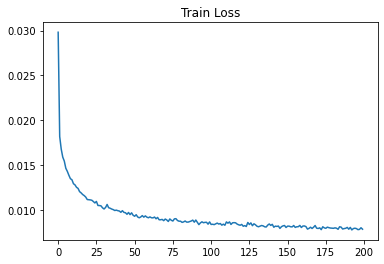

In [137]:
sns.lineplot(x=range(len(losses)), y=losses)
plt.title('Train Loss')
plt.show()

### Evaluation

In [138]:
def evaluation(dataloader, loss_function, model):
    model.eval()
    Y_pred = []
    Y_true = []
    
    for idx,data in enumerate(dataloader):
        features, target = data
        Y_pred.extend(model(features).data.numpy())
        Y_true.extend(target.numpy())
        
    return Y_pred, Y_true

In [139]:
Y_pred_scaled, Y_real_scaled = evaluation(test_loader, criterion, net)

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.graphics.tsaplots import plot_pacf

In [141]:
y_pred = mm.inverse_transform(Y_pred_scaled)
y_real = mm.inverse_transform(Y_real_scaled)

final_df = pd.DataFrame(np.hstack((y_pred, y_real)))
final_df.columns = ['Prediction', 'Real']
print(f'MAE: {mean_absolute_error(final_df["Prediction"],final_df["Real"])}')
print(f'MSE: {mean_squared_error(final_df["Prediction"],final_df["Real"])}')

MAE: 2.1139586452833594
MSE: 6.296873425489182


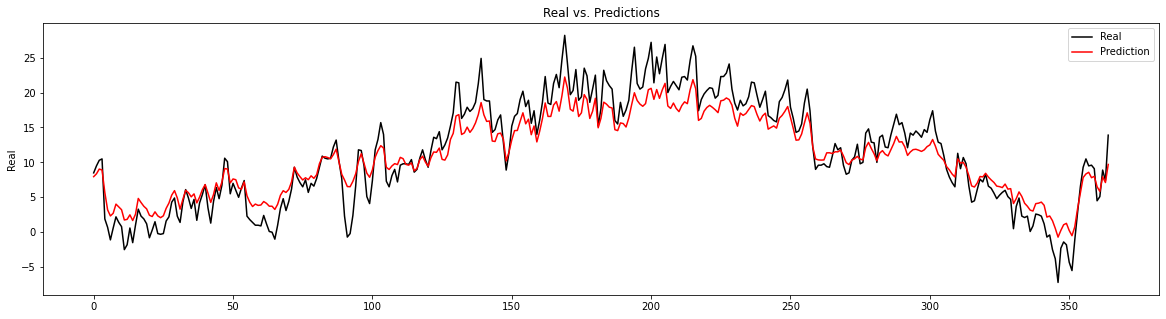

In [142]:
plt.figure(figsize=(20, 5))
sns.lineplot(x=range(len(final_df['Real'])) ,y=final_df['Real'],color='black',label='Real')
sns.lineplot(x=range(len(final_df['Prediction'])),y=final_df['Prediction'],color='red',label='Prediction')
plt.title('Real vs. Predictions')
plt.show()

In [ ]:
## Index(['FM', 'RSK', 'RSKF', 'SHK_TAG', 'NM', 'VPM', 'PM', 'TMK', 'UPM',
##       'UPDATED_DATE', 'TMK_LAG', 'YEAR', 'DAY_SIN', 'DAY_COS', 'MONTH_SIN',
##       'MONTH_COS', 'DAY_OF_YEAR_SIN', 'DAY_OF_YEAR_COS', 'WEEK_OF_YEAR_SIN',
##       'WEEK_OF_YEAR_COS', 'QUARTER_SIN', 'QUARTER_COS']

In [150]:
future_data_row = np.array([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]], dtype = np.float32)

future_data_tensor = torch.tensor(future_data_row)

net.eval()

with torch.no_grad():
    prediction = net(future_data_tensor)
    
prediction_np = prediction.numpy()

print("Predicted value:",prediction_np)

Predicted value: [[0.51291496]]
